Importing required libraries

In [80]:
import matplotlib.pyplot as plt
import nltk

# make sure that graphs are embedded into our notebook output
%matplotlib inline

Gathering the text and removing stop words

In [81]:
#Text Path
textpath = "./Charles Dickens.txt"

#Open file
with open(textpath, "r") as file:
    text = file.read()

    
listofToken = nltk.word_tokenize(text)

theText = nltk.Text(listofToken)

#Parse for only words
theText = [token for token in theText if token[0].isalpha()]

stopwords = nltk.corpus.stopwords.words("english")

#Remove the stop words from the list
theText = [token for token in theText if token not in stopwords]

Trying to match different frequncy in a plot

     I   said    Mr.    The  would    one   upon little  could     He     It   know   time    old    man 
 23806   6410   4740   2456   2416   2243   2013   2004   1983   1869   1788   1763   1611   1517   1438 


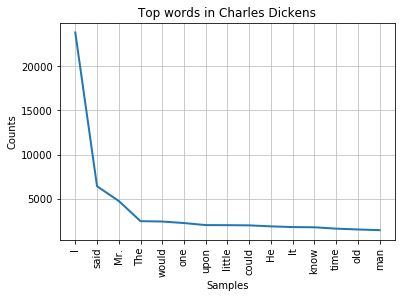

In [82]:
#Find the frequency distribution
NewFreqs = nltk.FreqDist(theText)

#Display the first 25 result in a tab form
NewFreqs.tabulate(15)

#Plot the first 25 results
NewFreqs.plot(15, title="Top words in Charles Dickens")


Now trying ot match frequency of different words and in terms of Mr. and main characters

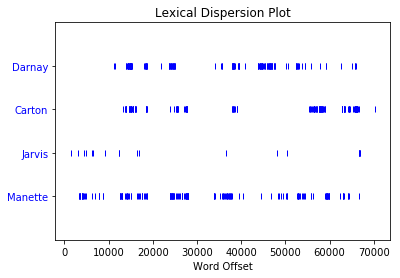

In [83]:
theText = nltk.Text(theText)
theText.dispersion_plot(["Darnay", "Carton", "Jarvis", "Manette"])


Dividing it into sections for a better picture

In [84]:
numWords = len(theText)
sections = 5
numSectWords = int(numWords/sections)

print(numWords)
print(numSectWords)

ListofWords = ["Mr.", "Darnay","Carton","Jarvis","Manette"]

freqsOfWord = [[],[],[],[],[]] # This is the list for the frequencies for each section
count = 0
for word in ListofWords:
    print("Starting search with " + word + "\n")
    for n in range(5):
        startSearch = n * numSectWords # Calculate the index of the start of the section
        stopSearch = startSearch + numSectWords - 1 # Calculate the end of the section
        # Get the frequency of the word in the section and append to list
        freqsOfWord[count].append(theText[startSearch:stopSearch].count(word)) 
        print("Added " + str(theText[startSearch:stopSearch].count(word)) + " for word " + word + " section " + str(n))
    count += 1

# Here we check the list
print("\n")
print(freqsOfWord)


457716
91543
Starting search with Mr.

Added 717 for word Mr. section 0
Added 577 for word Mr. section 1
Added 1071 for word Mr. section 2
Added 1330 for word Mr. section 3
Added 1045 for word Mr. section 4
Starting search with Darnay

Added 145 for word Darnay section 0
Added 0 for word Darnay section 1
Added 0 for word Darnay section 2
Added 0 for word Darnay section 3
Added 0 for word Darnay section 4
Starting search with Carton

Added 154 for word Carton section 0
Added 0 for word Carton section 1
Added 0 for word Carton section 2
Added 0 for word Carton section 3
Added 0 for word Carton section 4
Starting search with Jarvis

Added 19 for word Jarvis section 0
Added 0 for word Jarvis section 1
Added 0 for word Jarvis section 2
Added 0 for word Jarvis section 3
Added 0 for word Jarvis section 4
Starting search with Manette

Added 159 for word Manette section 0
Added 0 for word Manette section 1
Added 0 for word Manette section 2
Added 0 for word Manette section 3
Added 0 for word Ma

Graphing the results

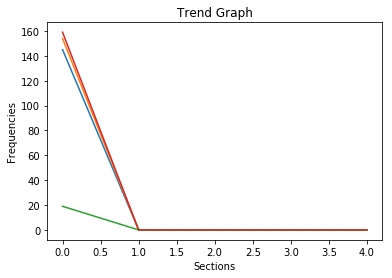

In [85]:
#plt.plot(freqsOfWord[0])
plt.plot(freqsOfWord[1])
plt.plot(freqsOfWord[2])
plt.plot(freqsOfWord[3])
plt.plot(freqsOfWord[4])

plt.xlabel('Sections') # X Axis Label
plt.ylabel('Frequencies') # Y Axis Label
plt.title('Trend Graph') # Plot Title


plt.show() # Show the plot.

Historgram

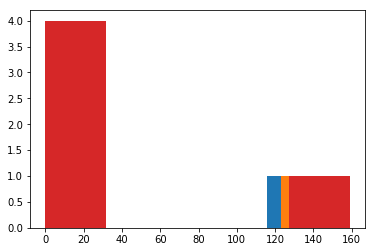

In [86]:
#plt.plot(freqsOfWord[0])
plt.hist(freqsOfWord[1], bins=5)
plt.hist(freqsOfWord[2], bins=5)
plt.hist(freqsOfWord[3], bins=5)
plt.hist(freqsOfWord[4], bins=5)

plt.show() # Show the plot.

Covert to function

In [87]:
def wordPerSection(theText, word, numSection):
    freqsOfWord = []
    for n in range(numSection):
        startSearch = n * numSectWords # Calculate the index of the start of the section
        stopSearch = startSearch + numSectWords - 1 # Calculate the end of the section
        # Get the frequency of the word in the section and append to list
        freqsOfWord.append(theText[startSearch:stopSearch].count(word)) 
    return freqsOfWord

Trying the function results 

In [88]:
print(wordPerSection(theText, "Carton", 5))

[154, 0, 0, 0, 0]


<Container object of 5 artists>

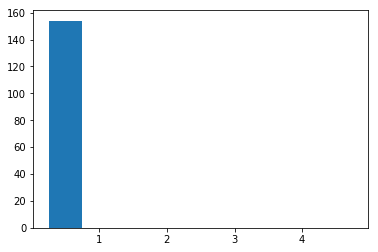

In [89]:
import numpy as np

Frequency = wordPerSection(theText, "Carton", 5)

AmountFrequency = np.array(range(len(Frequency)))+0.5


plt.bar(AmountFrequency,Frequency, width=0.5)
